# Project Description

For this project, you’ll work with data from Instacart.

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

***Dataset*** 
    
The dataset we've provided for you has been modified from the original. We've reduced the size of the dataset so that your calculations run faster and we’ve introduced missing and duplicate values. We were also careful to preserve the distributions of the original data when we made our changes.

***Mission***
    
Your mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. After answering each question, write a brief explanation of your results in a markdown cell of your Jupyter notebook.

This project will require you to make plots that communicate your results. Make sure that any plots you create have a title, labeled axes, and a legend if necessary; and include plt.show() at the end of each cell with a plot.


`Preprocessing`

***Verify and fix data types (e.g. make sure ID columns are integers)***
    
Identify and fill in missing values
    
Identify and remove duplicate values
    
Be sure to explain what types of missing and duplicate values you found, how you filled or removed them, why you used those methods, and why you think these missing and duplicate values may have been present in the dataset.

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

`Dataset Description`

***instacart_orders.csv: each row corresponds to one order on the Instacart app***
    
'order_id': ID number that uniquely identifies each order
    
'user_id': ID number that uniquely identifies each customer account
    
'order_number': the number of times this customer has placed an order
    
'order_dow': day of the week that the order placed (which day is 0 is uncertain)
    
'order_hour_of_day': hour of the day that the order was placed
    
'days_since_prior_order': number of days since this customer placed their previous order

In [3]:
df_orders = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/EDA/instacart_orders.csv', sep=';')

#df_orders.info() #first check

#print(df_orders['days_since_prior_order'].isna().sum()) #finding the amount of missing values
#print(df_orders['days_since_prior_order'].value_counts(dropna=False)) #used to find the count as well as sniff out the NaN

#df_orders['days_since_prior_order'] = df_orders['days_since_prior_order'].fillna(31.0) #replacing with day 31 as that is the missing value
#print(df_orders['days_since_prior_order'].isna().sum()) #checking for NaN again to verify

#df_orders['days_since_prior_order'] = df_orders['days_since_prior_order'].astype('int') #changing column to integer

#print(df_orders.duplicated()) #extra check
#print(df_orders.nunique()) #extra check

df_orders.info() #last check to make sure things are flowing correctly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


`Dataset Description`

***products.csv: each row corresponds to a unique product that customers can buy***
    
'product_id': ID number that uniquely identifies each product
    
'product_name': name of the product
    
'aisle_id': ID number that uniquely identifies each grocery aisle category
    
'department_id': ID number that uniquely identifies each grocery department category

In [4]:
df_products = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/EDA/products.csv', sep=';') #removed keep_default_na=False
#df_products.info() #first check

#print(df_products['product_name'].isna().sum()) #finding the amount of missing values
#print(df_products['product_name'].value_counts(dropna=False))

#print(df_products[df_products.isna().any(axis=1)]) #checking for any similarities in the empty product_name values

#print(df_products.duplicated()) #extra check
#print(df_products.nunique()) #extra check

df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


**`Comments`**

Similar to the above when it comes to preprocessing, initial thoughts are that we can do away with 1258 missing values out of 49694 (~2.5% share). 

Before removal got curious to see if there was a specific aisle_id/department_id. Turns out it's aisle_id 100 and department_id 21 which is missing.

`Dataset Description`

***aisles.csv***
    
'aisle_id': ID number that uniquely identifies each grocery aisle category
    
'aisle': name of the aisle

In [5]:
df_aisles = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/EDA/aisles.csv', sep=';')
#df_aisles.info() #first check

#print(df_aisles[df_aisles['aisle_id'] == 100]) #checking aisle_id vs the missing values in the prior dataset

#print(df_aisles.duplicated()) #extra check
#print(df_aisles.nunique()) #extra check

df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


**`Comments`**

Ran a quick check to see if we could get an aisle for the missing values in df_products, turns out it's missing in this dataset as well!

No percieved issues with missing values. Checked for duplicates as well.


`Dataset Description`

***departments.csv***
    
'department_id': ID number that uniquely identifies each grocery department category
    
'department': name of the department

In [6]:
df_departments = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/EDA/departments.csv', sep=';')
#df_departments.info() #first check

#print(df_departments.duplicated()) #extra check
#print(df_departments.nunique()) #extra check

#print(df_departments) #checking for department_id 21 (related to missing value from previous dataset)

df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


**`Comments`**

Ran the usual checks, nothing that popped up.

Did run a quick check on the department_id related to the missing values in prior datasets, still 'missing'

`Dataset Description`

***order_products.csv: each row corresponds to one item placed in an order***
    
'order_id': ID number that uniquely identifies each order
    
'product_id': ID number that uniquely identifies each product
    
'add_to_cart_order': the sequential order in which each item was placed in the cart
    
'reordered': 0 if the customer has never ordered this product before, 1 if they have
    

In [7]:
df_order_products = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/EDA/order_products.csv', sep=';')
df_order_products.info(show_counts=True) #first check passing in show_counts=True given size of data

#print(df_order_products.duplicated())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


**`Comments`**

Looks like a possible data type change is in order with the add_to_card_order if there is no reason to have decimal points (after a check).

`orders data frame`

In [8]:
# Check for duplicated orders
df_orders.duplicated().sum()

15

**`Comments`**

Found 15 duplicated rows using duplicated() along with sum(), which may impair the quality of the analysis.

In [9]:
# Check for all orders placed Wednesday at 2:00 AM
print(df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [10]:
# Reviewer's code

display(df_orders.head(3))
df_orders.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0


**`Comments`**

Assuming days of week are 1-7 with 0 as uncertain and that the hours are under a 24H format.

In [11]:
# Remove duplicate orders

#duplicated_orders = df_orders[df_orders.duplicated()] 
#print(duplicated_orders) #printing a DataFram consisting of duplicates to verify

df_orders = df_orders.drop_duplicates()

**`Comments`**

Printed the 15 duplicated rows to start and start the process of removing the duplicate orders.

Ran drop.duplicates() on df_orders in order to remove the 15 rows we found earlier (reassignig it to the DataFrame).

In [12]:
# Double check for duplicate rows
df_orders.duplicated().sum()

0

**`Comments`**

Running the same check as the initial view into the data to make sure we processed the data correctly (with a count to check vs the 15 from prior code blocks).


In [13]:
# Double check for duplicate order IDs only
df_orders.duplicated(subset='order_id').sum()


0

**`Comments`**

Checked for duplicate order IDs in the DataFram with no duplicate instances.

For one last check, ran info on the DataFrame to validate that we only removed the 15 rows of duplicates and if the total entries make sense (15 row difference). This holds true.


`products data frame`

In [14]:
# Check for fully duplicate rows
#df_products.nunique()
df_products.duplicated().sum()

0

**`Comments`**

Calling duplicated along with sum on the df_products DataFrame to find fully duplicate rows, did not find any. Left subset alone since this captures all.

In [15]:
# Check for just duplicate product IDs
df_products.duplicated(subset='product_id').sum()

0

**`Comments`**

Similar call to the above but now focusing on a specific column using the subset parameter and calling sum for the total.


In [16]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'] = df_products['product_name'].str.lower()

df_products.duplicated(subset='product_name').sum()

#duplicated_products = df_products[df_products['product_name'].duplicated()] 
#print(duplicated_products.sample(n=15)) #printing a DataFram consisting of duplicates to verify

1361

**`Comments`**

Converted the column to a lower case string and reassigned it to the DataFrame.

Ran duplicated along with sum on the product name column to check for duplicates.

In [17]:
# Check for duplicate product names that aren't missing
#dup_prod = display(df_products.duplicated(subset='product_name').notnull().sum())
#print(dup_prod)
df_products.info() #checking the structure

duplicate_and_not_missing = df_products[(df_products['product_name'].str.lower().duplicated()) 
                                        & (df_products['product_name'].notnull())] #combining the two statements to get duplicated values then returning those that are not null

display(duplicate_and_not_missing) #confirming this returns those items where product name is not missing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


**`Comments`**

Running notnull along with sum to get a count of those product names that are not 'blank'.

With the count I can now check the difference to the count in code block #340 and match to the total rows.

`departments data frame`

In [18]:
# missing instructions so I'm going to make the assumption that this is to 'Check for fully duplicate rows'

df_departments.duplicated().sum()

0

**`Comments`**

Called duplicated + sum on the departments DataFrame found no duplicates.
    

In [19]:
# missing instructions so I'm going to make the assumption that this is to 'Double check for any other tricky duplicates'

print(df_departments.duplicated(subset='department').sum())
#print(df_departments.duplicated(subset='department').nunique()) #confirming there is only one unique value

print(df_departments.duplicated(subset='department_id').sum())
#print(df_departments.duplicated(subset='department_id').nunique()) #confirming there is only one unique value


0
0


**`Comments`**

Using the same method as the prior code block but now with the two subset parameters (easier done here since there are only two columns.

Also calling nunique to confirm that there is only one unique value in the column.
    

`aisles data frame`

In [20]:
# missing instructions so I'm going to make the assumption that this is to 'Check for fully duplicate rows'

df_aisles.duplicated().sum()

0

**`Comments`**

Same as above, called duplicated + sum on the departments DataFrame found no duplicates.
    

In [21]:
# missing instructions so I'm going to make the assumption that this is to 'Double check for any other tricky duplicates'

print(df_aisles.duplicated(subset='aisle').sum())
#print(df_aisles.duplicated(subset='aisle').nunique()) #confirming there is only one unique value


print(df_aisles.duplicated(subset='aisle_id').sum()) 
#print(df_aisles.duplicated(subset='aisle_id').nunique()) #confirming there is only one unique value


0
0


**`Comments`**

Using the same method as the prior code block but now with the two subset parameters (easier done here since there are only two columns.

Also calling nunique to confirm that there is only one unique value in the column.

`order_products data frame`

In [22]:
# Check for fullly duplicate rows

df_order_products.duplicated().sum()

0

In [23]:
# Double check for any other tricky duplicates
#df_order_products.info()

#print(df_order_products.duplicated(subset=['order_id']).sum())
#print(df_order_products.duplicated(subset=['order_id']).nunique())
order_duplicate_check = df_order_products[df_order_products.duplicated(subset=['order_id'])].sort_values('order_id')
display(order_duplicate_check) #found duplicates by sorting the values

#print(df_order_products.duplicated(subset=['product_id']).sum())
#print(df_order_products.duplicated(subset=['product_id']).nunique())
product_duplicate_check = df_order_products[df_order_products.duplicated(subset=['product_id'])].sort_values('product_id')
display(product_duplicate_check) #found duplicates by sorting the values

#print(df_order_products.duplicated(subset=['add_to_cart_order']).sum())
#print(df_order_products.duplicated(subset=['add_to_cart_order']).nunique())
#product_duplicate_check = df_order_products[df_order_products.duplicated(subset=['add_to_cart_order'])].sort_values('add_to_cart_order')
#display(product_duplicate_check) #expected duplicates

#print(df_order_products.duplicated(subset=['reordered']).sum())
#print(df_order_products.duplicated(subset=['reordered']).nunique())
#product_duplicate_check = df_order_products[df_order_products.duplicated(subset=['reordered'])].sort_values('reordered')
#display(product_duplicate_check) #expected duplicates 



,order_id,product_id,add_to_cart_order,reordered
2834230,4,26434,2.0,1
1420535,4,10054,5.0,1
2507695,4,17616,10.0,1
1295279,4,39758,3.0,1
1299531,4,32645,12.0,1
...,...,...,...,...
1718460,3421071,21791,2.0,0
1692878,3421071,32293,4.0,1
1505667,3421077,27966,1.0,0
4417991,3421077,45007,2.0,0


,order_id,product_id,add_to_cart_order,reordered
4266839,1983366,1,13.0,0
528900,1773146,1,6.0,1
3985558,1977647,1,1.0,1
4390924,161236,1,4.0,0
1113333,1484430,1,7.0,1
...,...,...,...,...
1285776,2077154,49694,12.0,0
407602,2059001,49694,2.0,1
724125,3034802,49694,10.0,0
547362,191729,49694,11.0,1


**`Comments`**

Called duplicated on each subset of the DataFrame + sum/nunique to find the duplication and the number of unique values per column.


In [24]:
# duplicate check

df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id'])]

,order_id,product_id,add_to_cart_order,reordered


`products data frame`

In [25]:
###no instructions so taking a guess here

df_products['product_name'].value_counts()

product_name
green tea with ginseng and honey                                        3
carrot and celery sticks                                                2
apricot energy bar                                                      2
top the tater chive & onion sour cream                                  2
proactive health indoor weight & hairball care with chicken cat food    2
                                                                       ..
all natural chicken apple sausage                                       1
quartered artichoke hearts                                              1
big eye ipa                                                             1
unstopables lush                                                        1
fresh foaming cleanser                                                  1
Name: count, Length: 48332, dtype: int64

**`Comments`**

Found the empty/missing product name instance using value_counts on the specific column.

1258 instances without a product name.

In [26]:
# Are all of the missing product names associated with aisle ID 100?

#combining the two asks to return where aisle_id equals to 100 along with missing product name values 
aisle100_and_not_missing = df_products[(df_products['aisle_id'] == 100) 
                                        & (df_products['product_name'].isna())] 

display(aisle100_and_not_missing) #confirming this is displaying the 1258 rows where all missing product names are associated to aisle ID 100

###testing below###
not_aisle100_and_not_missing = df_products[(df_products['aisle_id'] != 100) 
                                        & (df_products['product_name'].isna())] #test on aisle_id not equal to 100
display(not_aisle100_and_not_missing) #displaying table

aisle99_and_not_missing = df_products[(df_products['aisle_id'] == 99)] #test on aisle_id 99
display(aisle99_and_not_missing) #test on a random aisle_id


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


,product_id,product_name,aisle_id,department_id


,product_id,product_name,aisle_id,department_id
985,986,crushed pineapple in 100% juice,99,15
1122,1123,fruit vegetable mango fruit square,99,15
1140,1141,apple and pineapple,99,15
1192,1193,lite sliced pears in extra light syrup,99,15
1296,1297,strawberry apple sauce to go packs,99,15
...,...,...,...,...
48478,48479,strawberry apple sauce fruit pouches,99,15
48523,48524,apple cinnamon applesauce on the go,99,15
49109,49110,apple banana applesauce on the go pouches,99,15
49338,49339,organic unsweetened applesauce,99,15


**`Comments`**
    
Called groupby on the DataFrame to get a specific view into the two columns in question and hone in on the aisle_id.

Paired groupby with size to get the rows and compute group sizes.
    
I've ran two further tests where aisle_id is not 100 (which does not return a result) and a further test on a random aisle_id to cement this finding. There are no other aisle_ids that have a missing product name

In [27]:
# Are all of the missing product names associated with department ID 21?

#df_products.groupby(['product_name', 'department_id']).size() #yes

#combining the two asks to return where aisle_id equals to 100 along with missing product name values 
dep21_and_not_missing = df_products[(df_products['department_id'] == 21) 
                                        & (df_products['product_name'].isna())] 

display(dep21_and_not_missing) #confirming this is displaying the 1258 rows where all missing product names are associated to dept ID 21 (matches the above)

###testing below###
not_dep21_and_not_missing = df_products[(df_products['department_id'] != 21) 
                                        & (df_products['product_name'].isna())] #test on department_id not equal to 21
display(not_dep21_and_not_missing) #displaying table

dep13_and_not_missing = df_products[(df_products['department_id'] == 13)] #test on department_id 13
display(dep13_and_not_missing) #test on a random aisle_id

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


,product_id,product_name,aisle_id,department_id


,product_id,product_name,aisle_id,department_id
1,2,all-seasons salt,104,13
4,5,green chile anytime sauce,5,13
49,50,pumpkin muffin mix,105,13
64,65,organic red wine & olive oil dressing organic,89,13
66,67,jelly- blackberry,88,13
...,...,...,...,...
49642,49643,tomatillo salsa cranberry-mango,51,13
49653,49654,teriyaki sauce- sesame- original,5,13
49658,49659,organic creamed coconut,17,13
49679,49680,all natural creamy caesar dressing,89,13


**`Comments`**

Same process as above but now with a different column to compare against department_id 21.

***Similar story as the above, tested when not dept id 21 and a random dept (13) to further cement conclusion. There is no other department_id with missing product_name***

In [28]:
# What is this ailse and department?

print(df_aisles[df_aisles['aisle_id'] == 100])

print(df_departments[df_departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


**`Comments`**

Filtered for both the aisle_id and the department_id with a conditional. 

Both the aisle and department is 'missing' from the DataFrames.


In [29]:
# Fill missing product names with 'Unknown'

df_products['product_name'] = df_products['product_name'].fillna('Unknown')
display(df_products['product_name'].value_counts())

product_name
Unknown                                                                 1258
green tea with ginseng and honey                                           3
carrot and celery sticks                                                   2
apricot energy bar                                                         2
proactive health indoor weight & hairball care with chicken cat food       2
                                                                        ... 
all natural chicken apple sausage                                          1
quartered artichoke hearts                                                 1
big eye ipa                                                                1
unstopables lush                                                           1
fresh foaming cleanser                                                     1
Name: count, Length: 48333, dtype: int64

**`Comments`**

Called the fillna() method on the product_name since this is being treated as a string type column (from our conversion to lower_case in the earlier problem set).
    

`orders data frame`

In [30]:
###no instructions so taking a guess here

df_orders['days_since_prior_order'].isna().sum()

28817

In [31]:
# Are there any missing values where it's not a customer's first order?
### 
df_orders.info()
print()
print(df_orders.isna().sum())
print()
missing_check = df_orders[df_orders['order_number'] != 1].isna().sum() #attempting to find missing values where order_number is not 1 (first order)
print(missing_check)
print()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64



**`Comments`**

Don't believe there are any missing values where it's not a customer's first order from the above checks.

`order_products data frame`

In [32]:
###no instructions so taking a guess here

df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [33]:
# What are the min and max values in this column? ###not sure which column you're asking about so will be taking a guess here

#print(df_order_products['add_to_cart_order'].describe()) #checking with describe to see if values needed actually contain decimals
print(df_order_products['add_to_cart_order'].min())
print()
print(df_order_products['add_to_cart_order'].max())

1.0

64.0


In [34]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

#df_order_products[['order_id','add_to_cart_order']].isna().sum()

df_missing = df_order_products[df_order_products['add_to_cart_order'].isna()] #saving order IDs with missing value in add_to_cart_order
display(df_missing.head(20))


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
34183,844733,32717,NaN,0
57981,61355,5322,NaN,0
58228,936852,31373,NaN,1
62655,264710,40281,NaN,0
64336,1717990,39408,NaN,0


In [35]:
# Do all orders with missing values have more than 64 products?

#na_orders = df_order_products[df_order_products['add_to_cart_order'].isna()]
#print(na_orders)

#df_order_products.info(show_counts=True)

#df_order_products.plot(kind='hist', y='product_id', x=na_orders, legend=None)

#product_count = df_order_products[df_order_products['product_id'] >= 64]
#print(product_count['na_orders'])


#2nd attempt!

#taking unique values from the list above where add_to_cart_order values are NaN
unique_values = df_missing.order_id.unique() #70 unique order_IDs
#isplay(unique_values)

#finding rows where order_id is in prior list of uniques
#unique_rows = df_missing.order_id.drop_duplicates(keep=False) #9 unique rows from list above
#display(unique_rows)

#grouping by order_id then counting
#unique_group = df_missing.groupby('order_id').count() #a few cases where products are under 64!
#display(unique_group)

#rint(df_order_products[df_order_products['order_id'].isin(unique_values)].groupby('order_id').count())

###fixing code!
more_than_64 = df_order_products[df_order_products['order_id'].isin(unique_values)].groupby('order_id').count()
display(more_than_64.sort_values('product_id')) #sorted values on a column after the count to get a sense of the actual product amounts

,product_id,add_to_cart_order,reordered
order_id,,,
9310,65,64,65
747668,65,64,65
1598369,65,64,65
1677118,65,64,65
2170451,65,64,65
...,...,...,...
1959075,98,64,98
171934,104,64,104
2136777,108,64,108


In [36]:
# Reviewer's code 2

df_order_products[df_order_products['order_id'].isin(unique_values)]

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
4543519,2621907,32018,28.0,1
4544672,102236,34688,49.0,0
4544708,2256933,41544,21.0,0
4544771,180546,12741,46.0,1


In [37]:
# Replace missing values with 999 and convert column to integer type

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products.info(show_counts=True) #confirming that the NaN values in add_to_cart_order were 'filled in'

#print(df_order_products['add_to_cart_order'] == 999)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4545007 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


**`Comments`**

Used fillna() on the column to fill in the missing values with 999 then ran a quick check to see if the total amount was populated via .info    

# [A] Easy (must complete all to pass)

[A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [38]:
#print(df_orders['order_hour_of_day'].value_counts())

print(df_orders['order_hour_of_day'].unique())
print()
print(df_orders['order_hour_of_day'].nunique())

[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]

24


**`Comments`**

Printing multiple ways of finding the range of 0-23 for order_hour_of_day.

nunique counting 0 as an unique value.

In [39]:
#print(df_orders['order_dow'].value_counts())

print(df_orders['order_dow'].unique())
print()
print(df_orders['order_dow'].nunique())

[6 5 0 4 3 1 2]

7


**`Comments`**

Similar to the above, printing multiple ways of finding the range of 0-6 for order_dow.

nunique counting 0 as an unique value.

[A2] What time of day do people shop for groceries?

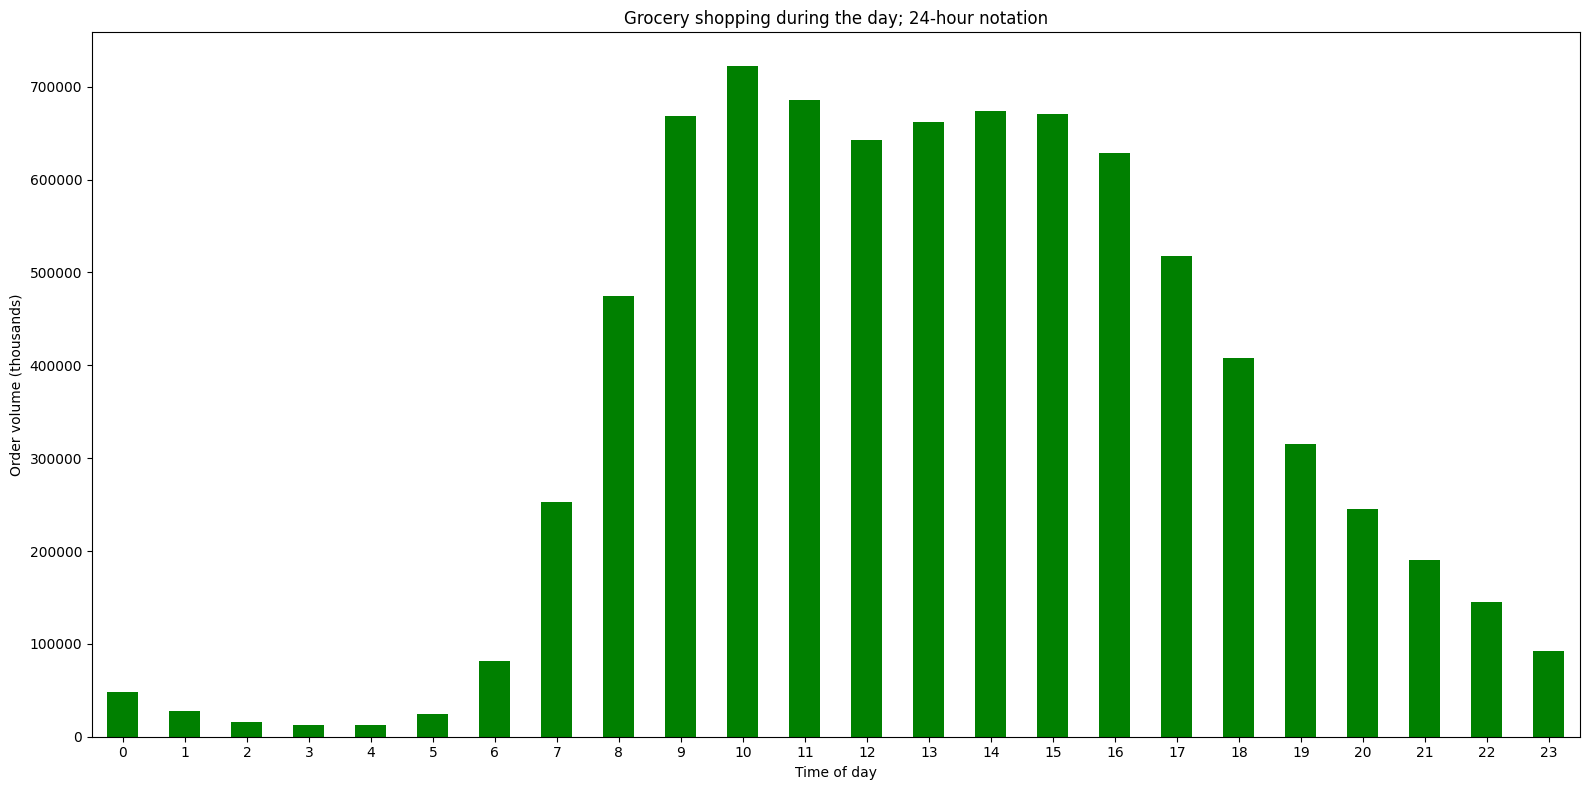

In [40]:
#Create a plot that shows how many people place orders for each hour of the day.

orders_subset = df_orders.groupby('order_hour_of_day').agg(['sum']).reset_index()

orders_subset.plot(
    x='order_hour_of_day',
    y='order_number',
    xlabel='Time of day',
    ylabel='Order volume (thousands)',
    title='Grocery shopping during the day; 24-hour notation',
    figsize=[16,8],
    kind='bar',
    color='green',
    rot=0,
    legend=False
)

plt.tight_layout()
plt.show()

**`Comments`**

Running out of steam trying to meet the deadline. Would amend the following if I had the time:

Fix y_axis to read: 100k, 200k, etc. OR completely remove the y_axis relying on a good legend/data labels combo.
Group time of day by Morning, Afternoon and Evening.
    
We can infer that people largely start their day by ordering food in the morning with a slight decrease in order volumn come 12 o'clock then another slight peak from 1pm to 4pm. Once 4pm comes around people start ordering less. 


- Another thing we can infer is that people tend to order in the morning to forget about grocery shopping and focusing on their day (usually because of work during the week). Delivery times can also play a role in this chart as the earlier you place an order the higher the guarantee that the order will be delivered that same day. 

    
- Would also assume that as people end their day they're more focused on cooking the food that they ordered earlier in the day (as they get home from work).


[A3] What day of the week do people shop for groceries?

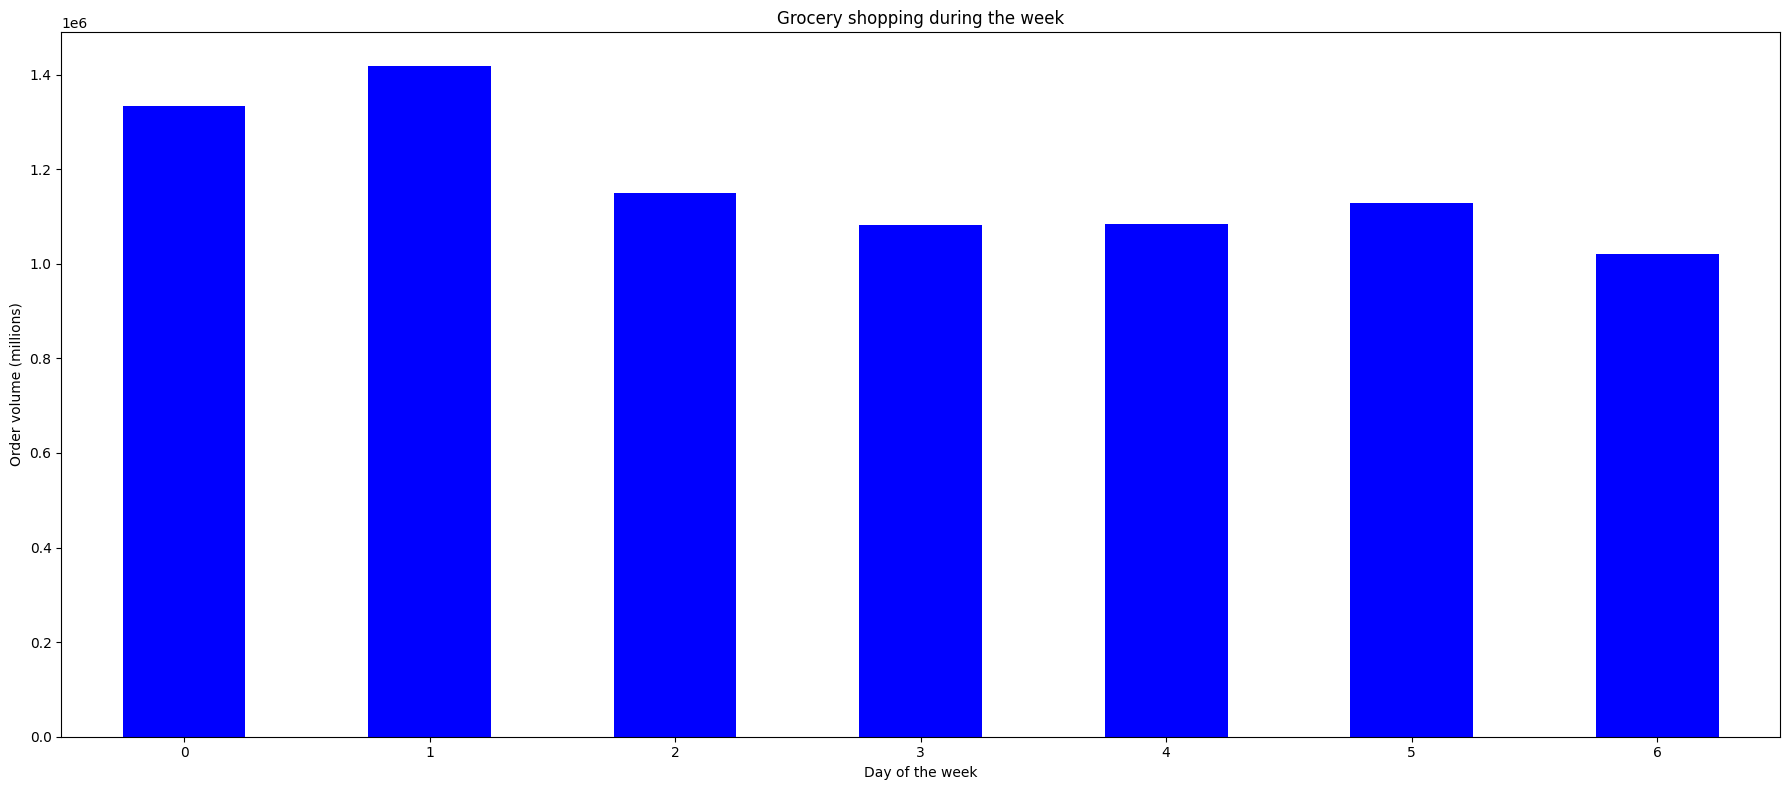

In [41]:
#Create a plot that shows what day of the week people shop for groceries.

orders_subset = df_orders.groupby('order_dow').agg(['sum']).reset_index()

orders_subset.plot(
    x='order_dow',
    y='order_number',
    xlabel='Day of the week',
    ylabel='Order volume (millions)',
    title='Grocery shopping during the week',
    figsize=[18,8],
    kind='bar',
    color='blue',
    rot=0,
    legend=False
)

plt.tight_layout()
plt.show()

**`Comments`**

Similar to the above, running out of steam trying to meet the deadline. Would amend the following if I had the time:

Fix y_axis to read: 100m, 200m, etc. OR completely remove the y_axis relying on a good legend/data labels combo.

Replace each value for Day of the week to read the actual Day of the week (Monday, Tuesday, etc..).

Figure out if day of week 0 is actually Saturday, as I would assume people go buy groceries more often on Saturdays.

### [A4] How long do people wait until placing another order?

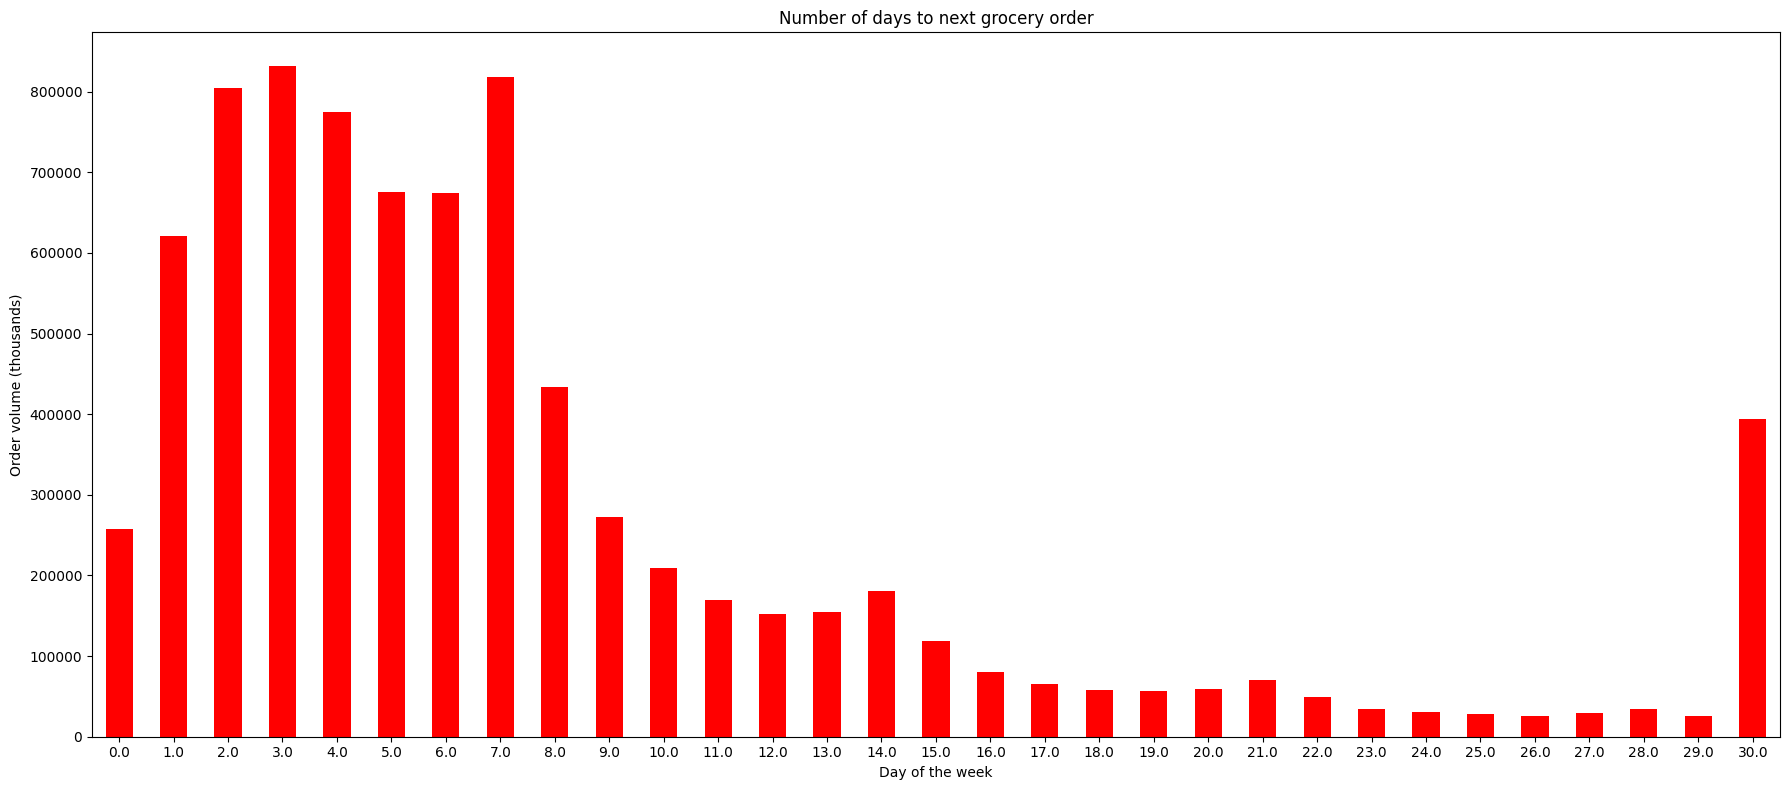

In [42]:
#Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum values.

orders_subset = df_orders.groupby('days_since_prior_order').agg(['sum']).reset_index()

orders_subset.plot(
    x='days_since_prior_order',
    y='order_number',
    xlabel='Day of the week',
    ylabel='Order volume (thousands)',
    title='Number of days to next grocery order',
    figsize=[18,8],
    kind='bar',
    color='red',
    rot=0,
    legend=False
)

plt.tight_layout()
plt.show()

**`Comments`**

Assumes that the 0 in Day of the week, is any order under 24 hours.

Would rework the y_axis, add a 'sub x-axis' under days of the week grouping the days by 1st half vs 2nd half of the month. 

With bullets calling out that people tend to reorder groceries under a 7 day period with one slight deviation at day 30 (bulk buyers?).


#Comment on the minimum and maximum values.

**`Comments`**

Minimum: Based on instacart data, people tend to reorder at a way lower frequency after the 1st half of the month. There is slight deviation at the obeserved day 30 which could be due to payday (not included in this data set - could be people being paid every month and placing their orders then). 

Maximum: Based on instacart data, people tend to reorder at the ~3 day mark followed by 7 days. This does not dive into order size though which could tell a better story. 

# [B] Medium (must complete all to pass)

[B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [43]:
###making the assumption that 0 in day of the week is Saturday since the days are uncertain

import pylab
from pylab import xticks


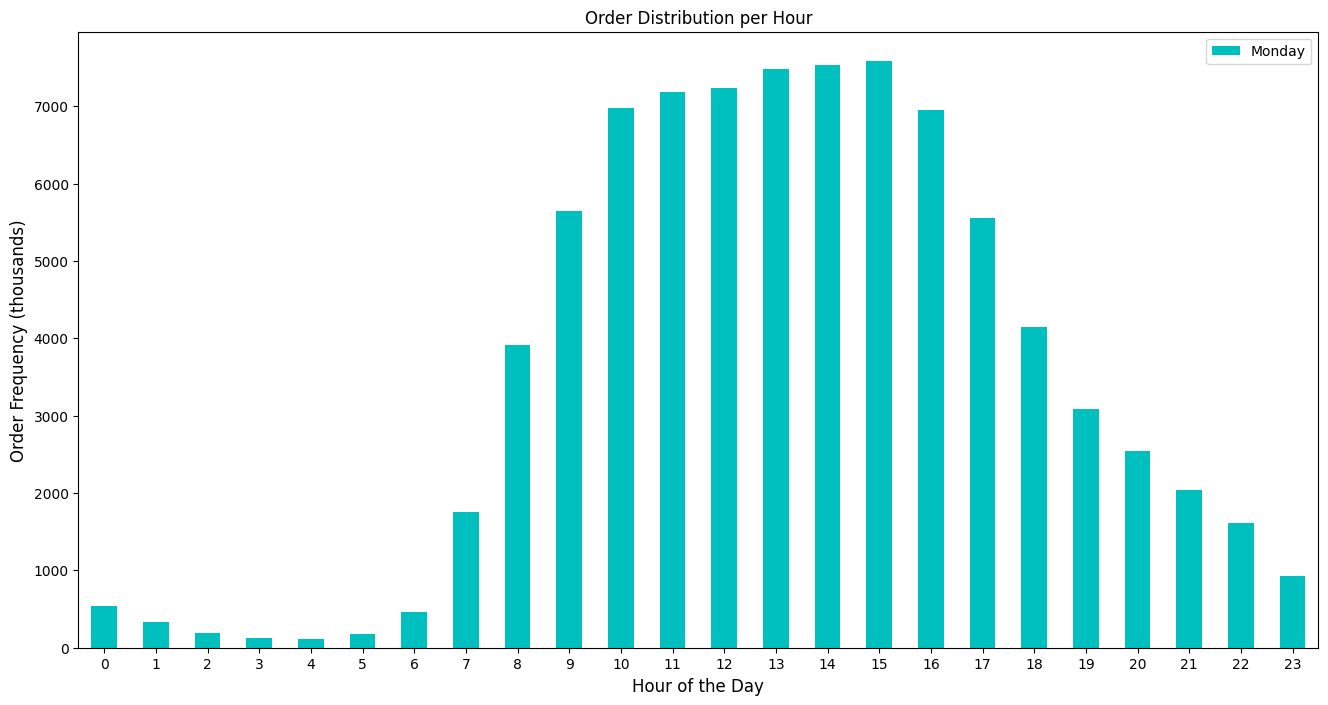

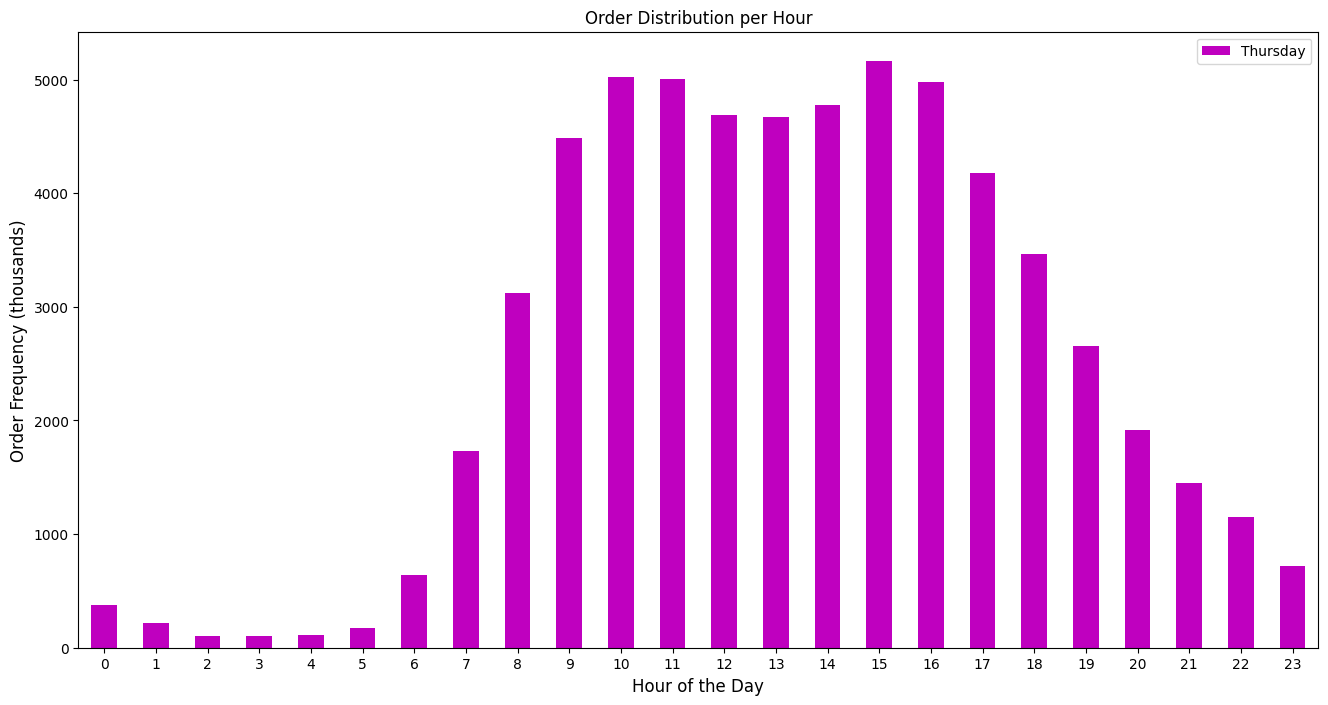

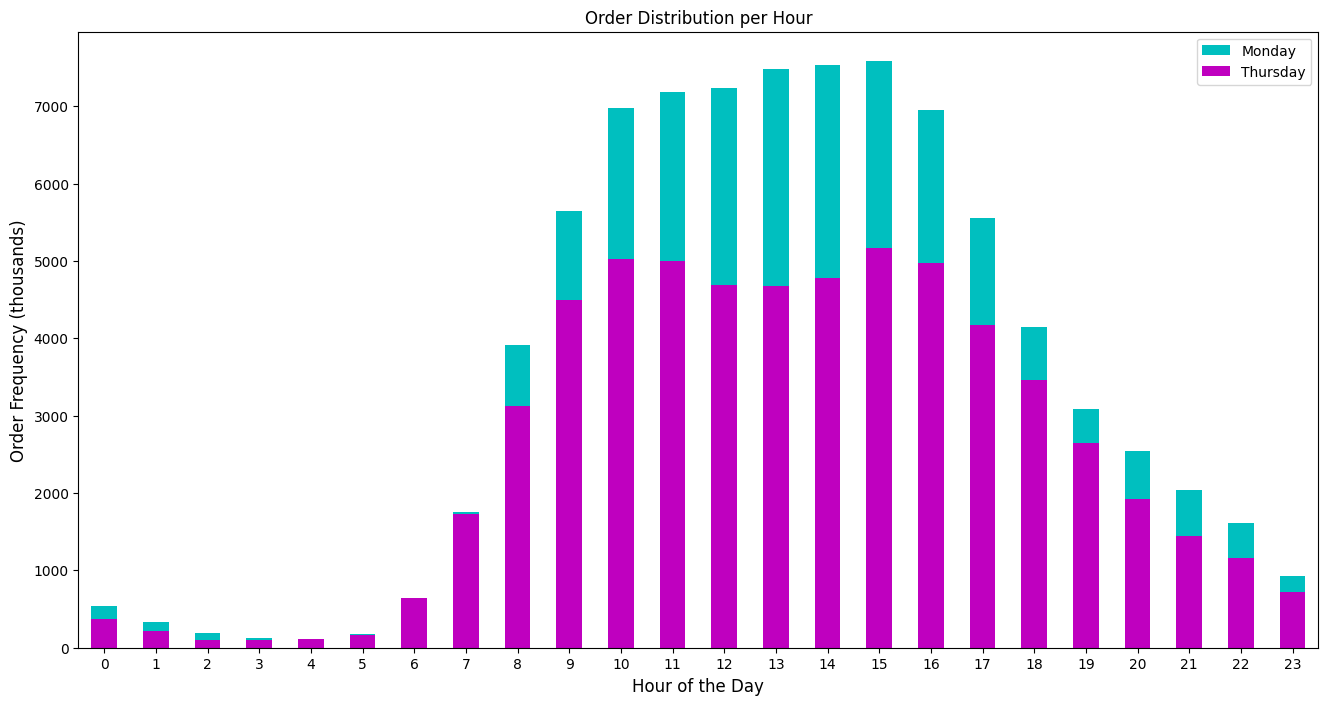

In [44]:
###changing this to a bar graph###

#xticks(range(0,31))

#chart 1

df_orders[df_orders['order_dow']== 0]['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                                                            figsize= [16,8],
                                                                                            color='c',
)

plt.xlabel('Hour of the Day', fontsize=12) #adding a specific label and increasing the font size for visibility
plt.ylabel('Order Frequency (thousands)', fontsize=12) #adding a specific label and increasing the font size for visibility
plt.legend(['Monday']) #labeling legend based on day assumptions, 0 = Mon / 3 = Thurs
plt.title('Order Distribution per Hour')
plt.xticks(rotation = 0);
plt.show()


#chart 2
df_orders[df_orders['order_dow']== 3]['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                                                            figsize= [16,8],
                                                                                            color='m'
)

plt.xlabel('Hour of the Day', fontsize=12) #adding a specific label and increasing the font size for visibility
plt.ylabel('Order Frequency (thousands)', fontsize=12) #adding a specific label and increasing the font size for visibility
plt.legend(['Thursday']) #labeling legend based on day assumptions, 0 = Mon / 3 = Thurs
plt.title('Order Distribution per Hour')
plt.xticks(rotation = 0)
plt.show()

#chart 3
df_orders[df_orders['order_dow']== 0]['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                                                            figsize= [16,8],
                                                                                            color='c',)
df_orders[df_orders['order_dow']== 3]['order_hour_of_day'].value_counts().sort_index().plot(kind='bar',
                                                                                            figsize= [16,8],
                                                                                            color='m')
plt.xlabel('Hour of the Day', fontsize=12) #adding a specific label and increasing the font size for visibility
plt.ylabel('Order Frequency (thousands)', fontsize=12) #adding a specific label and increasing the font size for visibility
plt.legend(['Monday','Thursday']) #labeling legend based on day assumptions, 0 = Mon / 3 = Thurs
plt.title('Order Distribution per Hour')
plt.xticks(rotation = 0)
plt.show()

**`Comments`**

Considerably higher frequency/distribution on Saturdays compared to Wednesdays. This looks to be especially true during the afternoons.

Would assume this is due to people having more free time during the weekends and well, people like to prep their meals for the week ahead during the weekend. 

We can infer here that while the overall distribution of order for both days is similar in peak and down times, Monday's frequency vastly overtakes Thursday in the mid-late morning all the way up to 4pm. Outside of these specific horizons, distribution between the two isn't as noticeable.


[B2] What's the distribution for the number of orders per customer?

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_number, Length: 157437, dtype: int64


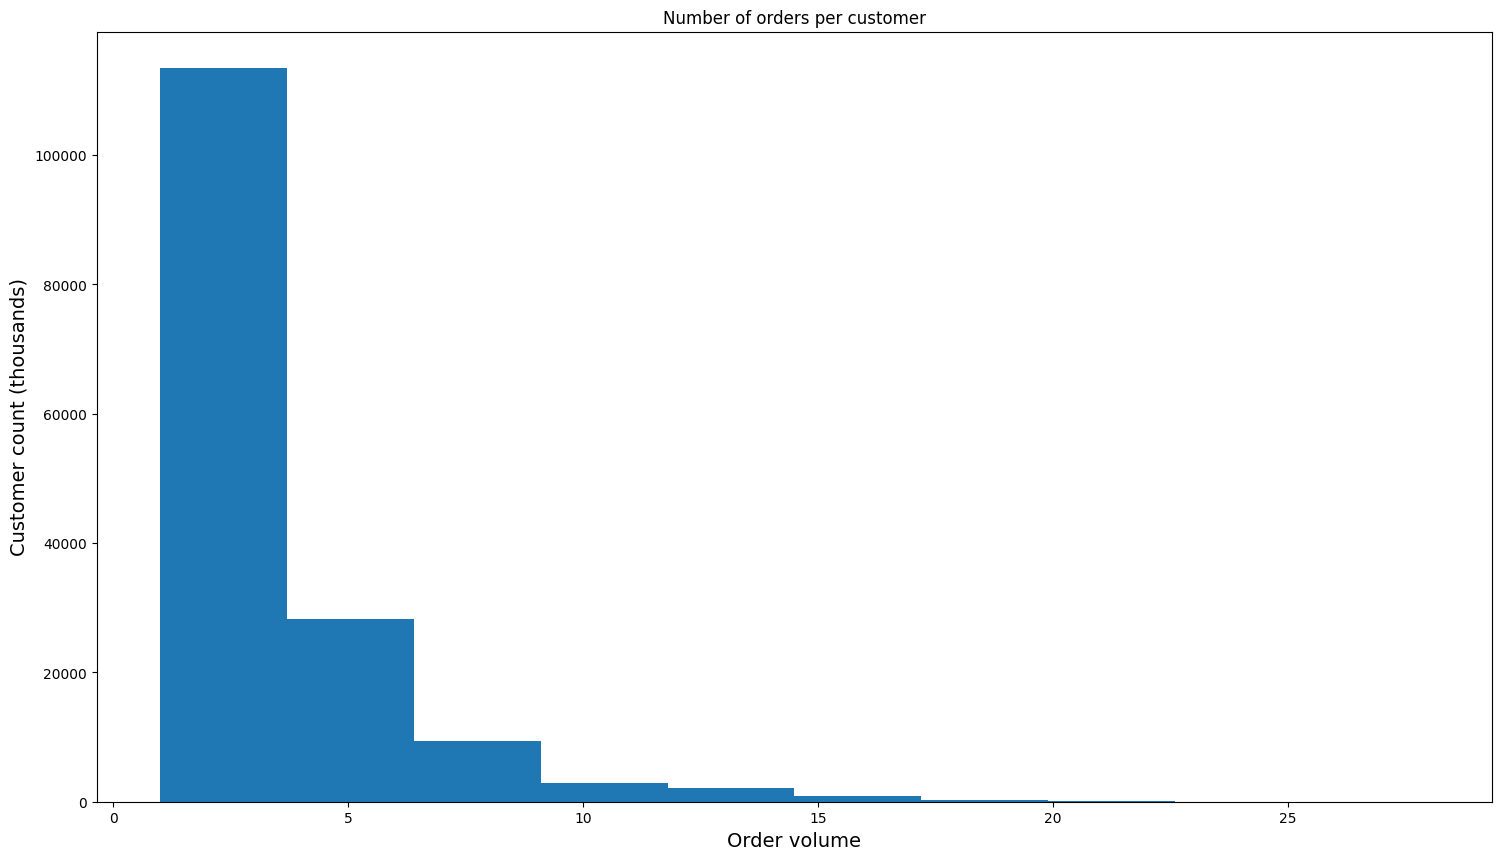

In [45]:
#Plot the distribution for the number of orders that customers place (e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…)

order_per_cust = df_orders.groupby('user_id')['order_number'].count()
print(order_per_cust)

order_per_cust.plot(kind='hist',
                    title='Number of orders per customer',
                    figsize=[18,10]
)

plt.xlabel('Order volume', fontsize=14) #adding a specific label and increasing the font size for visibility
plt.ylabel('Customer count (thousands)', fontsize=14) #adding a specific label and increasing the font size for visibility

plt.show()

**`Comments`**

One could infer that people like to take advantage of the 7 to 14 day trial instacart constantly offers to new customers (which is a popular offering) then slowly start to phase out if not completely cancel their trial period.

[B3] What are the top 20 popular products (display their id and name)?

In [46]:
###creating a new variable that is assigned the count with it's n largest passing in 20

top_merge = df_order_products.merge(df_products, on='product_id')

top_20 = top_merge[['product_id', 'product_name']].value_counts().nlargest(20)

display(top_20)

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
Name: count, dtype: int64

**`Comments`**

It looks like the top product remains as 'Unknown' after we filled that in (was blank).

Other items have a lower count of purchases. 
    
Bananas are the most ordered/popular product!


# [C] Hard (must complete at least two to pass)

[C1] How many items do people typically buy in one order? What does the distribution look like?

In [47]:
###assuming the DataFrames in question will be instacart_orders and order_products merged at order_id with add_to_cart_order and user_id as leveraged columns
##need to get the mean/average for each order (mean/average of add_to_card_order??? or product_id???)
##assuming add_to_cart_order contains the number of items that were checked out 


#print(df_order_products[(df_order_products['order_id'] == 3113005)].count()) #count check on a specific order_id to start
#print(df_order_products[(df_order_products['order_id'] == 3113005)]['add_to_cart_order'].mean()) #mean check on a specific order_id to start

df_order_merging = df_orders.merge(df_order_products, on='order_id')
#print(df_order_merge) #checking the table merge

display(df_order_merging.groupby('order_id')['add_to_cart_order'].mean())

#df_order_merging['Average items per order'] = df_order_merging['add_to_cart_order'].mean()

#print(df_order_merging[['add_to_cart_order','order_id']].value_counts().sample(n=5))

#df_order_merging_pivot = df_order_merging.pivot_table(index='order_id',
                                                #columns='product_id',
                                                #values='add_to_cart_order',
                                                #aggfunc='mean')

#print(df_order_merging_pivot)

order_id
4          7.0
9          8.0
11         3.0
19         2.0
20         4.5
          ... 
3421034    9.0
3421053    5.0
3421071    3.0
3421077    2.5
3421079    1.0
Name: add_to_cart_order, Length: 450046, dtype: float64

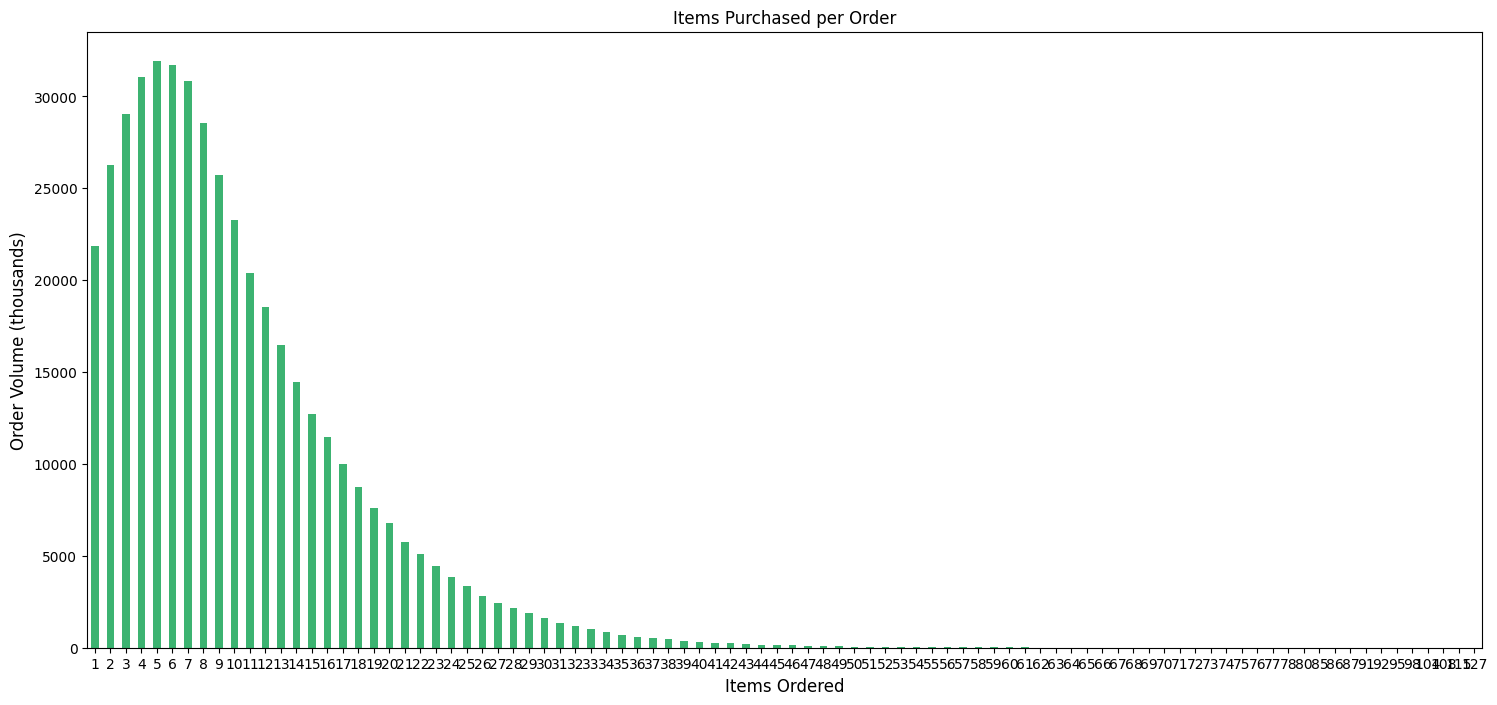

In [48]:
###second attempt with a different approach, yeah can't get it to work unfortunately

item_frequency = df_order_products.groupby('order_id')['product_id'].count()
item_frequency.value_counts().sort_index().plot(kind='bar', figsize= [18,8], color='mediumseagreen')

plt.xlabel('Items Ordered', fontsize=12) #adding a specific label and increasing the font size for visibility
plt.ylabel('Order Volume (thousands)', fontsize=12) #adding a specific label and increasing the font size for visibility
plt.title('Items Purchased per Order')
plt.xticks(rotation = 0)
plt.show()

**`Comments`**

We can infer from the graph that items peak from 4-8 items per order with a slow decline afterwards. People tend to order a smaller amount of items using the instacart app but does not mean it's the same with in-store shopping. 30,000 orders with 4-8 items / 30k to 25k with about 8-9 items and so forth. 5k orders with more than 20 items. Reinforces the thought that most people use instacart for easy purchases then later stop using it in favor or in-store shopping.
    
</div>

[C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [49]:
###creating a new variable that is assigned the count with it's n largest passing in 20
##for the reordered column: 0 if the customer has never ordered this product before, 1 if they have
#need to pair product name and id with each reorder, common denominator here is the *** product_id***

#df_order_products['reordered'] = df_order_products['reordered'] == 1 #filtering the reorder column to only show those items that have been ordered before

#print(df_order_products[(df_order_products['product_id'] == 24852) & df_order_products['reordered'] == 1].count()) #count check on bananas to start

filtered_df = df_order_products[df_order_products['reordered'] == 1]

df_product_merge = filtered_df.merge(df_products, on= 'product_id') #merging on common column

top_20 = df_product_merge.groupby(['product_id','product_name']).size().sort_values(ascending=False)
display(top_20.head(20))

product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
dtype: int64

**`Comments`**

Merged both DataFrames, joining them via the common column 'product_id' then ran a test for a banana which gave me the total count of reorders (if reorder = 1).

Once that was tested, went into the merged DataFrames and called value counts along with the nlargest passing in 20. 

Breakast types of food are ordered the most (fruits, vegetables).

[C3] For each product, what proportion of its orders are reorders?

In [50]:
###need to get the split of each product for the reordered column 0 and 1
##afterwards needs to take the total and divide by reorders
##test: banana proportion should be ***~84%***

#df_order_products['reordered'] = df_order_products['reordered'] = 1 #filtering the reorder column to only show those items that have been ordered before

#print(df_order_products[(df_order_products['product_id'] == 24852) & df_order_products['reordered'] == 1].count()) #count check on bananas to start

df_product_merge = df_order_products.merge(df_products, on= 'product_id') #merging on common column

#total_reorder = df_product_merge['reordered'].value_counts()
#reorder_1 = df_product_merge[df_product_merge['reordered'] == 1].value_counts()

#df_product_merge['proportion'] = reorder_1 / total_reorder
#print(df_product_merge[['product_name','proportion']])

grp = df_product_merge.groupby(['product_id','product_name'])
grp_mean = grp['reordered'].mean()
#display(grp_mean)

ncount = grp['reordered'].value_counts()
#display(ncount)

nlarge = grp['reordered'].count()
#display(nlarge)

product_proportion = ncount / nlarge
display(product_proportion)

##another try, nope - sucks to be this dumb..
#test_1 = df_order_products[df_order_products['reordered'] == 1]['reordered'].value_counts()
#test_0 = df_order_products[df_order_products['reordered'] == 0]['reordered'].value_counts()
#test_sum = test_1 + test_0
#print(test_1 / test_sum)

#print(df_product_merge.groupby(['product_id','product_name'])['reordered'].value_counts())

#reorder_y = df_product_merge[df_product_merge['reordered'] == 1].value_counts()
#reorder_n = df_product_merge[df_product_merge['reordered'] == 0].value_counts()

#df_product_merge['proportion'] = reorder_y / reorder_n

#print(df_product_merge['proportion'])

#print(df_product_merge[['product_name','product_id']].value_counts().nlargest(20))

#top_20 = df_product_merge['reordered'].value_counts().nlargest(20)

#print(top_20)


product_id  product_name                                     reordered
1           chocolate sandwich cookies                       1            0.564286
                                                             0            0.435714
2           all-seasons salt                                 0            1.000000
3           robust golden unsweetened oolong tea             1            0.738095
                                                             0            0.261905
                                                                            ...   
49692       organic instant oatmeal light maple brown sugar  1            0.416667
49693       spring water body wash                           0            0.560000
                                                             1            0.440000
49694       burrito- steak & cheese                          0            0.666667
                                                             1            0.333333
Length: 79992, d

[C4] For each customer, what proportion of their products ordered are reorders?

In [51]:
df_merge2 = df_order_products.merge(df_orders)
df_merge2.groupby('user_id')['reordered'].mean()


user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

[C5] What are the top 20 items that people put in their carts first? 

In [52]:
###need product_name to get the top 20 items
##will most likely have to leverage the add_to_cart_order column


top_20_merge = df_products.merge(df_order_products, on='product_id')

row_filter = top_20_merge[top_20_merge['add_to_cart_order'] == 1]
#row_filter.groupby(['product_id', 'product_name']).value_counts().nlargest(20)

#top_20 = df_products['product_name'].value_counts().nlargest(20)

#print(top_20)

top_20 = row_filter.groupby(['product_id'])['product_name'].value_counts().nlargest(20)

display(top_20)


product_id  product_name               
24852       banana                         15562
13176       bag of organic bananas         11026
27845       organic whole milk              4363
21137       organic strawberries            3946
47209       organic hass avocado            3390
21903       organic baby spinach            3336
47766       organic avocado                 3044
19660       spring water                    2336
16797       strawberries                    2308
27966       organic raspberries             2024
44632       sparkling water grapefruit      1914
49235       organic half & half             1797
47626       large lemon                     1737
196         soda                            1733
38689       organic reduced fat milk        1397
26209       limes                           1370
12341       hass avocados                   1340
5785        organic reduced fat 2% milk     1310
27086       half & half                     1309
22935       organic yellow on

**`Comments`**

It looks like bananas remain the top item which mirrors the story of top 20 items ordered.

# Conclusions

People like to place order to start the week, peaking early during the week with some continous drop off as the week goes by.
    
The same can be said about order time, we see heightened volume to start the morning into the mid-afternoon. With that said, the frequency of orders does not show you the story of the actual amount of items being purchased.

Once you dive into that dataset, we see mostly smaller (<12 items) purchases making up the largest share of the volume. With bananas and breakfast type food leading the pack in terms of items ordered in aggregate.

All in all, instacart seems to serve as a good introduction to online ordering to most customers who sign up for the app but with either tradition or just the sheer magnitude of grocery shopping people do (in the U.S.), they tend to leave the larger bulk purchases of groceries to actual in-store shopping where they can select their own items.
                                                            
It would be interesting to analyze this by age group given I could make the assumption that older people are less likely to use the app compared to younger ages. Another thing that would tell a better story would be analyzing the share of these orders placed that went through a trial period (which Instacart usually gives out like candy). Examining this together with the actual turnover (who actually decides to pay the instacart monthly or yearly fee and who doesn't) would tell a pretty good story of the app's ability to commercialize on its initiatives and/or flip people's choices.                                                            
                                                           
Last thing that would be extra interesting would be the % of people ordering and staying with the app who have a car vs those who don't. 
    
</div>